In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [17]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


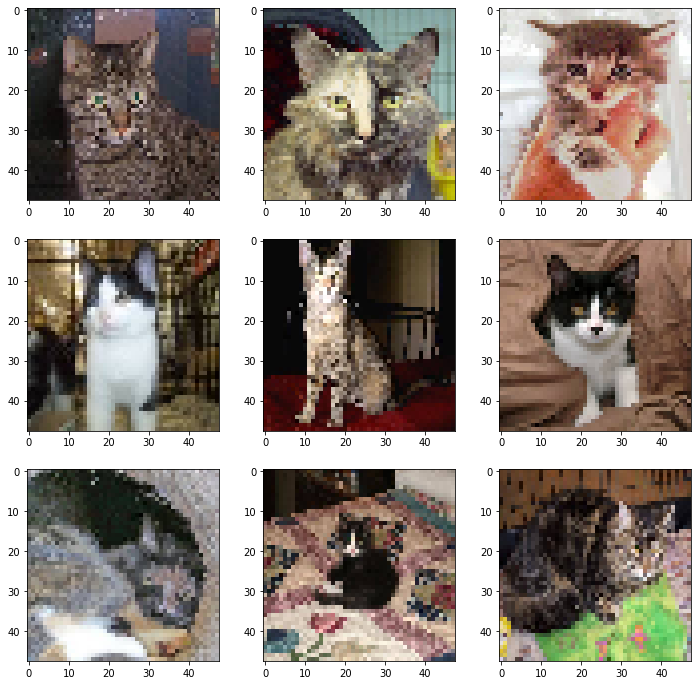

In [18]:
picture_size = 48
folder_path = r"D:/projects/dogscats/dogscats/train/"
expression = 'cats'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+expression+"/"+
                  os.listdir(folder_path + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [19]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [20]:
training_set = train_datagen.flow_from_directory(r'D:\projects\dogscats\dogscats\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'D:\projects\dogscats\dogscats\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 12981 images belonging to 2 classes.
Found 4589 images belonging to 2 classes.


In [21]:
#Model Building
model=Sequential()

#1st layers
model.add(Conv2D(filters=32,
                 padding="same",
                 kernel_size=3,
                 activation='relu',
                 input_shape=[64,64,3]
                 ))
model.add(MaxPooling2D(pool_size=2,strides=2))

#2nd layers
model.add(Conv2D(filters=32,
                 padding='same',
                 kernel_size=3,
                 activation='relu'
                 ))
model.add(MaxPooling2D(pool_size=2,strides=2))

#falatten layers
model.add(Flatten())

#Dense layers
model.add(Dense(units=128,activation='relu'))

#output layers
model.add(Dense(units=1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [23]:
#Training our  model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x=training_set,validation_data=test_set,epochs=10)

Epoch 1/10
406/406 [==============================] - 402s 988ms/step - loss: 0.6554 - accuracy: 0.6120 - val_loss: 0.6255 - val_accuracy: 0.6483
Epoch 2/10
406/406 [==============================] - 149s 366ms/step - loss: 0.5792 - accuracy: 0.6957 - val_loss: 0.6306 - val_accuracy: 0.6649
Epoch 3/10
406/406 [==============================] - 69s 171ms/step - loss: 0.5245 - accuracy: 0.7391 - val_loss: 0.5113 - val_accuracy: 0.7516
Epoch 4/10
406/406 [==============================] - 159s 392ms/step - loss: 0.4960 - accuracy: 0.7597 - val_loss: 0.4747 - val_accuracy: 0.7705
Epoch 5/10
406/406 [==============================] - 188s 463ms/step - loss: 0.4812 - accuracy: 0.7713 - val_loss: 0.5459 - val_accuracy: 0.7333
Epoch 6/10
406/406 [==============================] - 101s 250ms/step - loss: 0.4593 - accuracy: 0.7819 - val_loss: 0.4715 - val_accuracy: 0.7760
Epoch 7/10
406/406 [==============================] - 69s 171ms/step - loss: 0.4474 - accuracy: 0.7881 - val_loss: 0.4448 - v

In [24]:
model.save("cat_vs_dog_model.h5")

In [35]:
from tensorflow.keras.models import load_model
model=load_model(r"D:\pds_project\cat_vs_dog_model.h5")

In [36]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img(r"D:\projects\dogscats\dogscats\sample\train\dogs\dog.1402.jpg",target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)

[[0.81936586]]


In [37]:
if result[0]<=0.5:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog
